In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Zomato dataset using Pandas.

In [ ]:
df = pd.read_excel('data.xlsx')

Inspect the dataset and understand its structure.

In [ ]:
print("Info about the dataset:")
df.info()

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   Rating                       41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  int64  
 9   listed_in(type)              41263 non-null  object 
 10  listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [ ]:
print("Top five rows:")
df.head()

Top five rows:


,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(41263, 11)

In [ ]:
print("Column Names:")
df.columns

Column Names:


Index(['name', 'online_order', 'book_table', 'Rating', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Handle missing values appropriately.

In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
Rating,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
if df.isnull().sum().sum()==0:
    print("No missing values")
else:
    print("There are missing values")

No missing values


Remove duplicate entries.

In [ ]:
df.duplicated().sum()

np.int64(73)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Correct inconsistent data formats and Standardise key columns.

In [ ]:
df['cuisines'] = df['cuisines'].str.strip().str.replace(r"\s+", " ", regex=True).str.title()
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.strip()
cols_to_clean = ['listed_in(city)', 'online_order', 'name', 'book_table','listed_in(type)','Rating','votes']
df[cols_to_clean] = df[cols_to_clean].astype(str).apply(lambda col: col.str.strip().str.title())

In [ ]:
def standardize_location(name):
    abbreviations = {'btm': 'BTM', 'hsr': 'HSR', 'mg road': 'MG Road', 'jp nagar': 'JP Nagar',
                     'new bel road': 'New BEL Road', 'old airport road': 'Old Airport Road'}
    lowered = name.lower()
    if lowered in abbreviations:
        return abbreviations[lowered]
    return name.title()

df['listed_in(city)'] = df['listed_in(city)'].apply(standardize_location)
df['listed_in(city)'].unique() #no invalid format

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4Th Block', 'Koramangala 5Th Block',
       'Koramangala 6Th Block', 'Koramangala 7Th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
df_expand = df.copy()
df_expand['cuisines'] = df_expand['cuisines'].str.split(',')
df_expand=df_expand.explode('cuisines')
df_expand['cuisines'] = df_expand['cuisines'].str.strip()
unique_cuisines = df_expand['cuisines'].dropna().unique()
unique_cuisines.sort()
print(list(unique_cuisines))

['Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Australian', 'Awadhi', 'Bakery', 'Bar Food', 'Bbq', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Bohri', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee', 'Continental', 'Desserts', 'Drinks Only', 'European', 'Fast Food', 'Finger Food', 'French', 'German', 'Goan', 'Greek', 'Grill', 'Gujarati', 'Healthy Food', 'Hot Dogs', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Iranian', 'Italian', 'Japanese', 'Jewish', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mithai', 'Modern Indian', 'Momos', 'Mongolian', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern', 'North Indian', 'Oriya', 'Paan', 'Pan Asian', 'Parsi', 'Pizza', 'Portuguese', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Russian', 'Salad

In [ ]:
# Define the mapping dictionary
standardize_map = {
   'Cantonese': 'Asian',
    'Chinese': 'Asian',
    'Indonesian': 'Asian',
    'Japanese': 'Asian',
    'Korean': 'Asian',
    'Malaysian': 'Asian',
    'Mongolian': 'Asian',
    'Nepalese': 'Asian',
    'Pan Asian': 'Asian',
    'Singaporean': 'Asian',
    'Sri Lankan': 'Asian',
    'Thai': 'Asian',
    'Tibetan': 'Asian',
    'Vietnamese': 'Asian',
    'Burmese': 'Asian',
    'Sushi': 'Asian',

    # Bakery (includes Desserts)
    'Bakery': 'Bakery',
    'Desserts': 'Bakery',
    'Ice Cream': 'Bakery',
    'Mithai': 'Bakery',

    # Cafe
    'Beverages': 'Cafe',
    'Bubble Tea': 'Cafe',
    'Cafe': 'Cafe',
    'Coffee': 'Cafe',
    'Drinks Only': 'Cafe',
    'Juices': 'Cafe',
    'Tea': 'Cafe',

    # European
    'American': 'European',
    'Australian': 'European',
    'Belgian': 'European',
    'British': 'European',
    'French': 'European',
    'German': 'European',
    'Greek': 'European',
    'Italian': 'European',
    'Portuguese': 'European',
    'Russian': 'European',
    'Spanish': 'European',
    'Turkish': 'European',

    # Fast Food
    'Bar Food': 'Fast Food',
    'Bbq': 'Fast Food',
    'Burger': 'Fast Food',
    'Charcoal Chicken': 'Fast Food',
    'Finger Food': 'Fast Food',
    'Grill': 'Fast Food',
    'Hot Dogs': 'Fast Food',
    'Pizza': 'Fast Food',
    'Roast Chicken': 'Fast Food',
    'Rolls': 'Fast Food',
    'Sandwich': 'Fast Food',
    'Steak': 'Fast Food',
    'Wraps': 'Fast Food',
    'Momos': 'Fast Food',
    'Street Food': 'Fast Food',

    # Healthy Food
    'Healthy Food': 'Healthy Food',
    'Salad': 'Healthy Food',
    'Vegan': 'Healthy Food',

    # Middle Eastern
    'Afghan': 'Middle Eastern',
    'Afghani': 'Middle Eastern',
    'African': 'Middle Eastern',
    'Arabian': 'Middle Eastern',
    'Iranian': 'Middle Eastern',
    'Jewish': 'Middle Eastern',
    'Lebanese': 'Middle Eastern',
    'Mediterranean': 'Middle Eastern',
    'Middle Eastern': 'Middle Eastern',

    # North Eastern
    'Naga': 'North Eastern',
    'North Eastern': 'North Eastern',

    # North Indian
    'Awadhi': 'North Indian',
    'Assamese': 'North Indian',
    'Bihari': 'North Indian',
    'Biryani': 'North Indian',
    'Bengali': 'North Indian',
    'Gujarati': 'North Indian',
    'Hyderabadi': 'North Indian',
    'Kashmiri': 'North Indian',
    'Lucknowi': 'North Indian',
    'Maharashtrian': 'North Indian',
    'Mughlai': 'North Indian',
    'Oriya': 'North Indian',
    'Parsi': 'North Indian',
    'Rajasthani': 'North Indian',
    'Sindhi': 'North Indian',
    'Paan': 'North Indian',
   'Modern Indian': 'North Indian',

    # South Indian
    'Andhra': 'South Indian',
    'Chettinad': 'South Indian',
    'Kerala': 'South Indian',
    'Konkan': 'South Indian',
    'Mangalorean': 'South Indian',
    'South Indian': 'South Indian',
    'Tamil': 'South Indian',

    # Raw Meats
    'Bohri': 'Raw Meats',
    'Goan': 'Raw Meats',
    'Kebab': 'Raw Meats',
    'Raw Meats': 'Raw Meats',
    'Seafood': 'Raw Meats',
   'Other Meats':'Raw Meats',

    # South American
    'Mexican': 'South American',
    'South American': 'South American',
    'Tex-Mex': 'South American',
}

def standardize_cuisine(c):
    return standardize_map.get(c, c)  # Return mapped value if exists, else original

# Apply after exploding and stripping
df_expand['cuisines'] = df_expand['cuisines'].apply(standardize_cuisine)
df_expand['cuisines'].unique()


array(['North Indian', 'Asian', 'Cafe', 'South American', 'European',
       'South Indian', 'Fast Food', 'Continental', 'Bakery',
       'Healthy Food', 'Raw Meats', 'Middle Eastern', 'North Eastern'],
      dtype=object)

Convert columns to appropriate data types

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)
df['approx_cost(for two people)'].unique() #No invalid format

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80])

In [ ]:
df['Rating'] = df['Rating'].astype(float)
df['Rating'].unique() # No rating above 5 or any invalid format

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
df['votes'] = df['votes'].astype(int)
df['votes'].unique() #no invalid format

array([ 775,  787,  918, ..., 4957, 2382,  843])

Save the cleaned and structured dataset for analysis.

In [ ]:
df.to_csv('Zomato.csv', index=False)

Group data by cuisine and calculate average ratings, votes, and price range.

In [ ]:
grouped_df = df_expand.groupby('cuisines')[['Rating', 'votes', 'approx_cost(for two people)']].mean().reset_index()
print(grouped_df)


          cuisines    Rating        votes  approx_cost(for two people)
0            Asian  3.711037   438.912289                   759.995480
1           Bakery  3.791363   213.676718                   409.808830
2             Cafe  3.838630   410.219772                   539.397480
3      Continental  3.962046   833.909846                  1047.412355
4         European  4.015979  1059.292468                  1023.855598
5        Fast Food  3.748201   459.735150                   583.094983
6     Healthy Food  3.992580   774.219313                   821.058374
7   Middle Eastern  3.845470   735.345964                   889.758375
8    North Eastern  4.024194   334.838710                   725.806452
9     North Indian  3.636973   375.748083                   638.808599
10       Raw Meats  3.764193   497.604027                   737.603632
11  South American  3.940257   754.994485                   888.823529
12    South Indian  3.621115   240.058788                   528.852072


Identify top cuisines based on ratings and popularity (votes).

In [ ]:
top_rated = grouped_df.sort_values(by='Rating', ascending=False).head(10)
print("Top 10 cuisines by Rating:")
print(top_rated)

Top 10 cuisines by Rating:
          cuisines    Rating        votes  approx_cost(for two people)
8    North Eastern  4.024194   334.838710                   725.806452
4         European  4.015979  1059.292468                  1023.855598
6     Healthy Food  3.992580   774.219313                   821.058374
3      Continental  3.962046   833.909846                  1047.412355
11  South American  3.940257   754.994485                   888.823529
7   Middle Eastern  3.845470   735.345964                   889.758375
2             Cafe  3.838630   410.219772                   539.397480
1           Bakery  3.791363   213.676718                   409.808830
10       Raw Meats  3.764193   497.604027                   737.603632
5        Fast Food  3.748201   459.735150                   583.094983


In [ ]:
top_popular = grouped_df.sort_values(by='votes', ascending=False).head(10)
print("\nTop 10 cuisines by Votes:")
print(top_popular)


Top 10 cuisines by Votes:
          cuisines    Rating        votes  approx_cost(for two people)
4         European  4.015979  1059.292468                  1023.855598
3      Continental  3.962046   833.909846                  1047.412355
6     Healthy Food  3.992580   774.219313                   821.058374
11  South American  3.940257   754.994485                   888.823529
7   Middle Eastern  3.845470   735.345964                   889.758375
10       Raw Meats  3.764193   497.604027                   737.603632
5        Fast Food  3.748201   459.735150                   583.094983
0            Asian  3.711037   438.912289                   759.995480
2             Cafe  3.838630   410.219772                   539.397480
9     North Indian  3.636973   375.748083                   638.808599


In [ ]:
top_combined = grouped_df.sort_values(by=['Rating', 'votes'], ascending=[False, False]).head(10)
print("\nTop 10 cuisines by Rating and Votes combined:")
print(top_combined)


Top 10 cuisines by Rating and Votes combined:
          cuisines    Rating        votes  approx_cost(for two people)
8    North Eastern  4.024194   334.838710                   725.806452
4         European  4.015979  1059.292468                  1023.855598
6     Healthy Food  3.992580   774.219313                   821.058374
3      Continental  3.962046   833.909846                  1047.412355
11  South American  3.940257   754.994485                   888.823529
7   Middle Eastern  3.845470   735.345964                   889.758375
2             Cafe  3.838630   410.219772                   539.397480
1           Bakery  3.791363   213.676718                   409.808830
10       Raw Meats  3.764193   497.604027                   737.603632
5        Fast Food  3.748201   459.735150                   583.094983


Highlight best-rated restaurants and link them to their cuisine types

In [ ]:
top_restaurants = df_expand.sort_values(by=['Rating', 'votes'], ascending=False)
top_restaurants = top_restaurants.drop_duplicates(subset=['name'])
top_5 = top_restaurants[['name', 'cuisines', 'Rating', 'votes']].head(5)
print(top_5)



                                 name     cuisines  Rating  votes
39351     Byg Brewski Brewing Company  Continental     4.9  16832
29464       Ab'S - Absolute Barbecues     European     4.9   6490
40734                        Flechazo        Asian     4.9   3004
29835  Asia Kitchen By Mainland China        Asian     4.9   2256
14583                Milano Ice Cream       Bakery     4.9   2090


Analyse and generate insights into user preferences by cuisine.

In [ ]:
cuisine_insights = df_expand.groupby('cuisines')[['Rating', 'votes']] \
                            .agg(['mean', 'count']).reset_index()
cuisine_insights.columns = ['Cuisine', 'Avg_Rating', 'Rating_Count', 'Avg_Votes', 'Votes_Count']
cuisine_insights_sorted = cuisine_insights.sort_values(by='Avg_Rating', ascending=False)
print(cuisine_insights_sorted.head(15))


           Cuisine  Avg_Rating  Rating_Count    Avg_Votes  Votes_Count
8    North Eastern    4.024194            62   334.838710           62
4         European    4.015979          5457  1059.292468         5457
6     Healthy Food    3.992580          1833   774.219313         1833
3      Continental    3.962046          5180   833.909846         5180
11  South American    3.940257           544   754.994485          544
7   Middle Eastern    3.845470          1821   735.345964         1821
2             Cafe    3.838630          9842   410.219772         9842
1           Bakery    3.791363          8788   213.676718         8788
10       Raw Meats    3.764193          2533   497.604027         2533
5        Fast Food    3.748201         17761   459.735150        17761
0            Asian    3.711037         16372   438.912289        16372
9     North Indian    3.636973         25167   375.748083        25167
12    South Indian    3.621115          9917   240.058788         9917


Visualise key findings using Matplotlib.

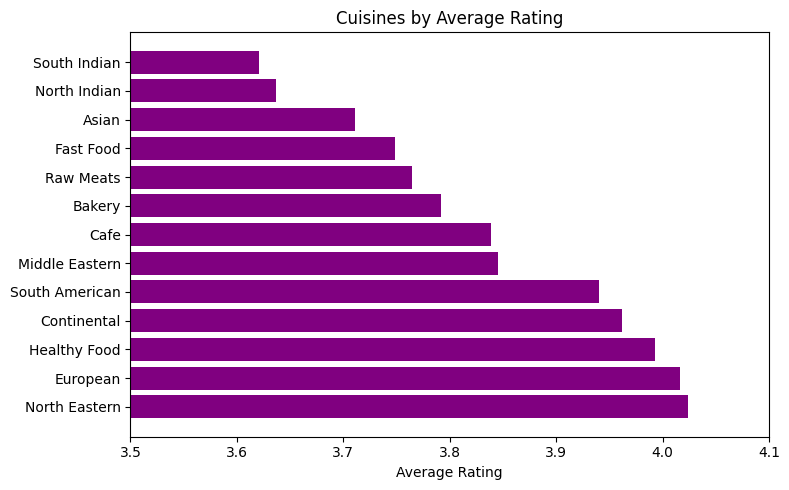

In [ ]:
import matplotlib.pyplot as plt
top_rated = cuisine_insights.sort_values(by='Avg_Rating', ascending=False).head(15)
plt.figure(figsize=(8, 5))
plt.barh(top_rated['Cuisine'], top_rated['Avg_Rating'], color='purple')
plt.xlabel('Average Rating')
plt.title('Cuisines by Average Rating')
plt.xlim(3.5, 4.1)
plt.tight_layout()
plt.show()

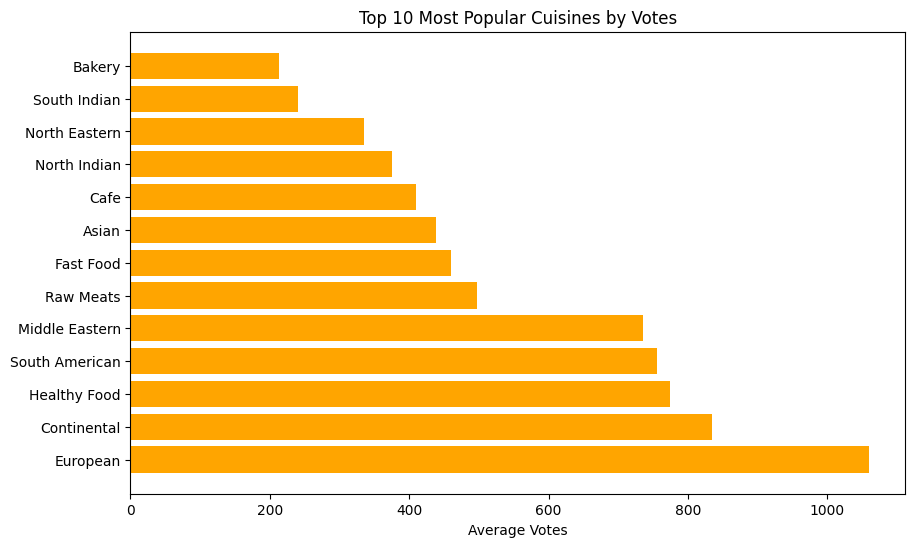

In [ ]:
top_voted = cuisine_insights.sort_values(by='Avg_Votes', ascending=False).head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_voted['Cuisine'], top_voted['Avg_Votes'], color='bla')
plt.xlabel('Average Votes')
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.show()